In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow_datasets as tfds
from tensorflow.data.experimental import sample_from_datasets
from keras.layers import Activation, Dense, Dropout

tfkl = tfk.layers

**Preprocessing**

As typical, we'll start with the MNIST data. Recall from last time, we have to do some transformations and preprocessing on these images.

In [2]:
data, info = tfds.load('mnist', with_info=True)

In [3]:
preprocess = lambda d: (tf.cast(d["image"], tf.float32)/255, tf.one_hot(d["label"], depth=10))

ds_train = data["train"].map(preprocess).cache().batch(32)
ds_test = data["test"].map(preprocess).cache().batch(32)

In [4]:
img_shape = info.features['image'].shape

In [5]:
img_shape

(28, 28, 1)

**CNNs in TF Keras**

We'll use the Sequential class rely on new layer types that correspond to concepts we covered in lecture: Conv2D, AvgPool2D, MaxPool2D. 

Details such as kernel size, padding, strides and so on must be specified as args to these classes, where appropriate.

In [6]:
model = tfk.Sequential()
model.add(tfkl.Conv2D(filters = 1, kernel_size=(3,3), strides=(1,1), 
                      padding="valid", activation='relu', input_shape=(28, 28, 1)))
model.add(tfkl.MaxPool2D(pool_size=(4,4)))
model.add(tfkl.Flatten())
model.add(tfkl.Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 1)         10        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 1)           0         
_________________________________________________________________
flatten (Flatten)            (None, 36)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                370       
Total params: 380
Trainable params: 380
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(
    optimizer=tfk.optimizers.RMSprop(),
    loss=tfk.losses.CategoricalCrossentropy(),
)

results = model.fit(ds_train, steps_per_epoch=20, epochs=20, validation_data=ds_test)

Epoch 1/20
20/20 [==============================] - 3s 137ms/step - loss: 2.4432 - val_loss: 2.4216
Epoch 2/20
20/20 [==============================] - 1s 75ms/step - loss: 2.3627 - val_loss: 2.3343
Epoch 3/20
20/20 [==============================] - 1s 75ms/step - loss: 2.3235 - val_loss: 2.2762
Epoch 4/20
20/20 [==============================] - 1s 74ms/step - loss: 2.2564 - val_loss: 2.2292
Epoch 5/20
20/20 [==============================] - 1s 75ms/step - loss: 2.2251 - val_loss: 2.1800
Epoch 6/20
20/20 [==============================] - 2s 75ms/step - loss: 2.1366 - val_loss: 2.1211
Epoch 7/20
20/20 [==============================] - 1s 75ms/step - loss: 2.0866 - val_loss: 2.0599
Epoch 8/20
20/20 [==============================] - 2s 78ms/step - loss: 2.0600 - val_loss: 1.9931
Epoch 9/20
20/20 [==============================] - 2s 76ms/step - loss: 1.9455 - val_loss: 1.9259
Epoch 10/20
20/20 [==============================] - 2s 76ms/step - loss: 1.8408 - val_loss: 1.8545
Epoch 11

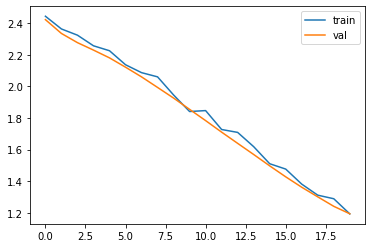

In [9]:
plt.plot(results.history["loss"])
plt.plot(results.history["val_loss"])
plt.legend(labels=["train", "val"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'Probability')

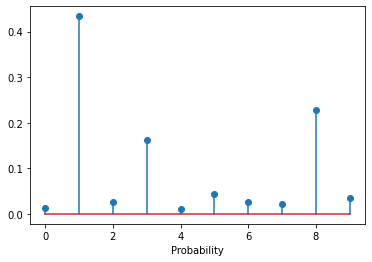

In [10]:
plt.stem(model.predict(ds_test.take(1))[9, :])
plt.xlabel("Digit")
plt.xlabel("Probability")

Which architectural hyperparameters might we change in the above?



**Exercise - Deep CNN**

Build and fit your own CNN model with 3 convolutional **modules**, where each one contains:
  * kernel convolution 
    * you pick number of kernels
    * you pick kernel shape/size
    * you pick activation
  * pooling
  * dropout

We'll use the Fashion MNIST dataset, a low-res collection of images of clothing.

In [11]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

images, labels = train
images = images/255.0
images = images[:, :, :, np.newaxis]
labels = tf.one_hot(labels.astype(np.int32), depth=10)  
# optional - TF Datasets objects
fmnist_train_ds = tf.data.Dataset.from_tensor_slices((images, labels))
fmnist_train_ds = fmnist_train_ds.shuffle(5000).batch(32)

images1, labels1 = test
images1 = images1/255.0
images1 = images1[:, :, :, np.newaxis]
labels1 = tf.one_hot(labels1.astype(np.int32),10)

fmnist_test_ds = tf.data.Dataset.from_tensor_slices((images1, labels1)).shuffle(5000).batch(32)

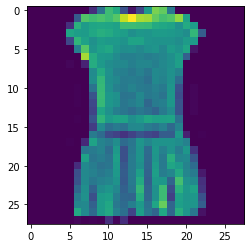

In [12]:
plt.imshow(images[3, :, :, :].squeeze())

In [13]:
model = tfk.Sequential()

# Block 1
model.add(tfkl.Conv2D(filters = 1, kernel_size= 2, strides= 2, 
                      padding="valid", activation='relu', input_shape=(28, 28, 1)))
model.add(tfkl.MaxPool2D(pool_size=(2)))
model.add(Dropout(0.2))

# Block 2
model.add(tfkl.Conv2D(filters = 8, kernel_size= 2, strides= 1, 
                      padding="valid", activation='relu'))
model.add(tfkl.MaxPool2D(pool_size=(2)))
model.add(Dropout(0.2))

# Block 3
model.add(tfkl.Conv2D(filters = 16, kernel_size= 2, strides= 1, 
                      padding="valid", activation='relu'))
model.add(tfkl.MaxPool2D(pool_size=(2)))
model.add(Dropout(0.2))

# Flatten
model.add(tfkl.GlobalMaxPool2D())
model.add(tfkl.Dense(10, activation='softmax'))

In [14]:
# your code here
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 1)         5         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 1)           0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 1)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 8)           40        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 8)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 16)         

In [15]:

model.compile(
    optimizer=tfk.optimizers.RMSprop(),
    loss=tfk.losses.CategoricalCrossentropy(),
)

results = model.fit(fmnist_train_ds,batch_size=32,steps_per_epoch=20, epochs=20,validation_data=fmnist_test_ds)

Epoch 1/20
20/20 [==============================] - 1s 48ms/step - loss: 2.3021 - val_loss: 2.3020
Epoch 2/20
20/20 [==============================] - 1s 41ms/step - loss: 2.3010 - val_loss: 2.3010
Epoch 3/20
20/20 [==============================] - 1s 43ms/step - loss: 2.3004 - val_loss: 2.2996
Epoch 4/20
20/20 [==============================] - 1s 42ms/step - loss: 2.2964 - val_loss: 2.2968
Epoch 5/20
20/20 [==============================] - 1s 42ms/step - loss: 2.2898 - val_loss: 2.2922
Epoch 6/20
20/20 [==============================] - 1s 42ms/step - loss: 2.2835 - val_loss: 2.2864
Epoch 7/20
20/20 [==============================] - 1s 41ms/step - loss: 2.2773 - val_loss: 2.2804
Epoch 8/20
20/20 [==============================] - 1s 40ms/step - loss: 2.2769 - val_loss: 2.2712
Epoch 9/20
20/20 [==============================] - 1s 39ms/step - loss: 2.2648 - val_loss: 2.2605
Epoch 10/20
20/20 [==============================] - 1s 40ms/step - loss: 2.2456 - val_loss: 2.2447
Epoch 11/

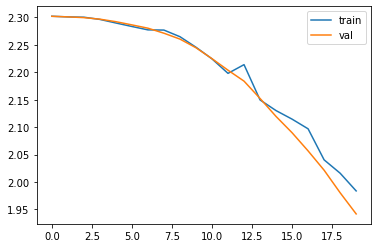

In [16]:
# plot
plt.plot(results.history["loss"])
plt.plot(results.history["val_loss"])
plt.legend(labels=["train", "val"])


#|**Exercise - Transfer Learning**



In [17]:
data, info = tfds.load('rock_paper_scissors', with_info=True)
train_data = data["train"].map(lambda x: (tf.cast(x["image"], tf.float32) / 255., tf.one_hot(x["label"], depth=3) )).batch(32)
test_data = data["train"].map(lambda x: (tf.cast(x["image"], tf.float32) / 255., tf.one_hot(x["label"], depth=3))).batch(32)

In [18]:
info.features['image'].shape

(300, 300, 3)

,image,label
0,,2 (scissors)
1,,2 (scissors)
2,,0 (rock)
3,,1 (paper)
4,,0 (rock)
5,,1 (paper)
6,,2 (scissors)
7,,1 (paper)
8,,2 (scissors)
9,,2 (scissors)

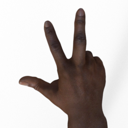
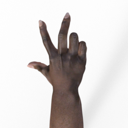
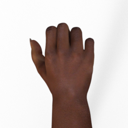
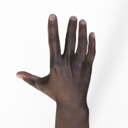
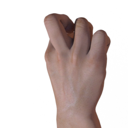
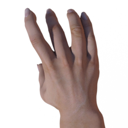
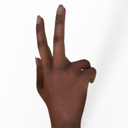
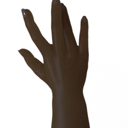
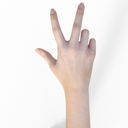
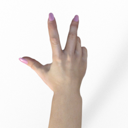

In [19]:
tfds.as_dataframe(data["train"].take(10), info)

# Exercise

1. Build a deep CNN model and train it for this binary classification task. Fit the model using the small dataset of 500 samples, *train_data*.

What accuracy can your model acheive on the training data?

In [20]:
# Your code here
df_train = data["train"].take(500)
df_train = df_train.map(lambda x: (tf.cast(x["image"], tf.float32) / 255.,tf.one_hot(x["label"], depth=3))).batch(32)

#Seperating labels and images
train_images, train_labels = next(iter(df_train))
test_images, test_labels = next(iter(test_data))

In [21]:

model = tfk.Sequential()

model.add(tfkl.Conv2D(32, 3, padding='same', activation='relu',kernel_initializer='he_uniform', input_shape = [300,300, 3]))
model.add(tfkl.MaxPooling2D(2))

model.add(tfkl.Conv2D(32, 3, padding='same', kernel_initializer='he_uniform', activation='relu'))
model.add(tfkl.MaxPooling2D(2))

model.add(tfkl.Conv2D(64, 3, padding='same', kernel_initializer='he_uniform',activation='relu'))
model.add(tfkl.MaxPooling2D(2))

model.add(tfkl.Conv2D(128, 3, padding='same', kernel_initializer='he_uniform',activation='relu'))
model.add(tfkl.MaxPooling2D(2))

model.add(tfkl.Flatten())
model.add(tfkl.Dense(128, kernel_initializer='he_uniform',activation = 'relu'))
model.add(tfkl.Dense(3, activation = 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 37, 37, 128)      

In [22]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1,  horizontal_flip=True)
it_gen = datagen.flow(train_images, train_labels, batch_size=32)

In [23]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


steps = int(train_images.shape[0] / 32)
results = model.fit(it_gen,epochs = 20,steps_per_epoch=steps, validation_data = (test_images, test_labels))

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 3.3987 - accuracy: 0.2812 - val_loss: 30.6963 - val_accuracy: 0.4688
Epoch 2/20
1/1 [==============================] - 1s 1s/step - loss: 30.3022 - accuracy: 0.4688 - val_loss: 8.6899 - val_accuracy: 0.4688
Epoch 3/20
1/1 [==============================] - 1s 1s/step - loss: 8.5728 - accuracy: 0.4688 - val_loss: 10.5988 - val_accuracy: 0.2500
Epoch 4/20
1/1 [==============================] - 1s 1s/step - loss: 10.4690 - accuracy: 0.2500 - val_loss: 5.9827 - val_accuracy: 0.2500
Epoch 5/20
1/1 [==============================] - 1s 1s/step - loss: 5.8872 - accuracy: 0.2500 - val_loss: 1.9510 - val_accuracy: 0.2500
Epoch 6/20
1/1 [==============================] - 1s 1s/step - loss: 1.9240 - accuracy: 0.2500 - val_loss: 1.4250 - val_accuracy: 0.2812
Epoch 7/20
1/1 [==============================] - 1s 1s/step - loss: 1.4078 - accuracy: 0.2812 - val_loss: 1.4751 - val_accuracy: 0.4688
Epoch 8/20
1/1 [=====================

 2. Now use transfer learning by incorporating the pretrained VGG16 model.

In [24]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights="imagenet",include_top=False,input_shape=(300,300,3))

Build a Sequential model, using our VGG16 base. Make sure the freeze the weights of the convolutional backbone, but leave the remainder of the network weights as learnable. Fit this model and compare the overall accuracy as well as the loss curves (efficiency).


In [25]:
# Your code here
model = tfk.Sequential()

model.add(conv_base)

for layer in model.layers:
    layer.trainable = False

model.add(tfkl.Flatten())
model.add(tfkl.Dense(3, activation = 'softmax'))

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 9, 9, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 124419    
Total params: 14,839,107
Trainable params: 124,419
Non-trainable params: 14,714,688
_________________________________________________________________


In [27]:
it_gen = datagen.flow(train_images, train_labels, batch_size=32)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


steps = int(train_images.shape[0] / 32)
results = model.fit(it_gen,epochs = 20,steps_per_epoch=steps, validation_data = (test_images, test_labels))

Epoch 1/20
1/1 [==============================] - 28s 28s/step - loss: 1.1276 - accuracy: 0.4375 - val_loss: 5.0303 - val_accuracy: 0.2500
Epoch 2/20
1/1 [==============================] - 28s 28s/step - loss: 5.1571 - accuracy: 0.2500 - val_loss: 0.6344 - val_accuracy: 0.7500
Epoch 3/20
1/1 [==============================] - 28s 28s/step - loss: 0.7334 - accuracy: 0.7188 - val_loss: 1.4465 - val_accuracy: 0.6250
Epoch 4/20
1/1 [==============================] - 28s 28s/step - loss: 1.4732 - accuracy: 0.5938 - val_loss: 2.0085 - val_accuracy: 0.7500
Epoch 5/20
1/1 [==============================] - 28s 28s/step - loss: 2.1271 - accuracy: 0.6875 - val_loss: 2.1326 - val_accuracy: 0.7500
Epoch 6/20
1/1 [==============================] - 28s 28s/step - loss: 2.2592 - accuracy: 0.7188 - val_loss: 1.8559 - val_accuracy: 0.7500
Epoch 7/20
1/1 [==============================] - 30s 30s/step - loss: 1.9133 - accuracy: 0.7500 - val_loss: 1.2943 - val_accuracy: 0.7500
Epoch 8/20
1/1 [===========

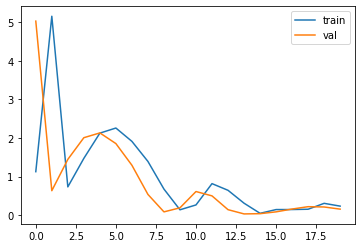

In [28]:
# plot
plt.plot(results.history["loss"])
plt.plot(results.history["val_loss"])
plt.legend(labels=["train", "val"])